📥 Chargement de données

# Introduction
📊 La première étape dans tout projet d’apprentissage automatique consiste à charger les données brutes dans le système.
Ces données brutes peuvent provenir d’un fichier journal (log), d’un fichier de dataset, d’une base de données ou d’un stockage d’objets dans le cloud, tel que Amazon S3.

👉 Souvent, nous devons récupérer des données depuis plusieurs sources à la fois.

🔍 Les recettes présentées dans ce chapitre explorent plusieurs méthodes pour charger des données issues de sources variées, notamment les fichiers CSV et les bases de données SQL.

🧪 Nous couvrons également des techniques permettant de générer des données simulées avec des propriétés spécifiques pour faciliter l’expérimentation.

🛠️ Bien qu’il existe de nombreuses façons de charger des données dans l’écosystème Python, ce chapitre met l’accent sur :
- la bibliothèque pandas et ses nombreuses méthodes pour charger des données externes ;
- la librairie scikit-learn, un outil open-source d’apprentissage automatique, utilisée ici pour générer des données simulées.


# 📂 Chargement d’un jeu de données d’exemple

On souhaite charger un jeu de données préexistant fourni par la bibliothèque ``scikit-learn``.

Scikit-learn propose plusieurs jeux de données populaires prêts à l’emploi :


In [3]:
#!pip install scikit-learn

In [4]:
# Charger les jeux de données de scikit-learn
from sklearn import datasets

# Charger le jeu de données des chiffres manuscrits
digits = datasets.load_digits()

# Créer la matrice de caractéristiques (features)
features = digits.data

# Créer le vecteur cible (target)
target = digits.target

# Afficher la première observation
features[0]
# Résultat : tableau de 64 valeurs représentant une image 8x8

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

🔍 Dans la pratique, nous n’avons pas toujours le temps de chercher, nettoyer et transformer des données réelles avant d’expérimenter un algorithme d’apprentissage automatique.

🎯 Heureusement, scikit-learn intègre des datasets (toy datasets), qui sont :
- de taille réduite
- propres et standardisés
- parfaits pour l’entraînement, l’exploration ou la démonstration rapide

✅ Deux des plus courants : 
| Dataset         | Description                                                                 | 
|----------------|-------------------------------------------------------------------------------| 
| load_iris     | 150 observations de mesures de fleurs d'iris, idéal pour la classification   | 
| load_digits   | 1 797 images de chiffres manuscrits (résolution 8×8), parfait pour l’imagerie |

📋 Pour afficher les détails du jeu de données, on utilise l’attribut DESCR :



In [5]:
# Imprimer la description du dataset
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

Cela nous donne une vue complète : nombre d’instances, nature des variables, auteur, etc.

# 🧪 Création d’un jeu de données simulé

On a besoin de générer un jeu de données simulé.

La bibliothèque ``scikit-learn`` propose plusieurs méthodes pour générer des données simulées. Les trois méthodes les plus couramment utilisées sont :
- ``make_regression`` → pour la régression linéaire
- ``make_classification`` → pour la classification supervisée
- ``make_blobs`` → pour les techniques de clustering

🔹 Exemple : Régression linéaire simulée


In [9]:
from sklearn.datasets import make_regression

# Générer les données
features, target, coefficients = make_regression(n_samples=100,
                                                  n_features=3,
                                                  n_informative=3,
                                                  n_targets=1,
                                                  noise=0.0,
                                                  coef=True,
                                                  random_state=1)

# Afficher les premières valeurs
print("Matrice de caractéristiques :\n", features[:3])
print("Vecteur cible :\n", target[:3])

Matrice de caractéristiques :
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]
Vecteur cible :
 [-10.37865986  25.5124503   19.67705609]


🧮 Résultat : une matrice de caractéristiques et un vecteur cible en valeurs flottantes.

🔹 Exemple : Classification simulée


In [10]:
from sklearn.datasets import make_classification

# Générer les données
features, target = make_classification(n_samples=100,
                                       n_features=3,
                                       n_informative=3,
                                       n_redundant=0,
                                       n_classes=2,
                                       weights=[.25, .75],
                                       random_state=1)

# Afficher les premières valeurs
print("Matrice de caractéristiques :\n", features[:3])
print("Vecteur cible :\n", target[:3])

Matrice de caractéristiques :
 [[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]]
Vecteur cible :
 [1 0 0]


📊 Résultat : un vecteur cible avec des valeurs entières représentant les classes.

🔹 Exemple : Clustering avec ``make_blobs``

In [11]:
from sklearn.datasets import make_blobs

# Générer les données
features, target = make_blobs(n_samples=100,
                              n_features=2,
                              centers=3,
                              cluster_std=0.5,
                              shuffle=True,
                              random_state=1)

# Afficher les premières valeurs
print("Matrice de caractéristiques :\n", features[:3])
print("Vecteur cible :\n", target[:3])

Matrice de caractéristiques :
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
Vecteur cible :
 [0 1 1]


📈 On peut facilement visualiser les groupes créés :

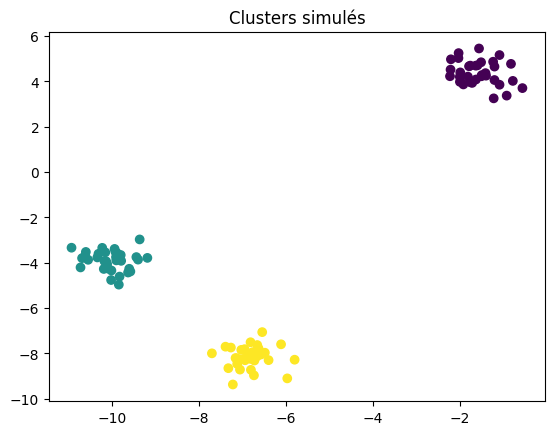

In [12]:
import matplotlib.pyplot as plt

plt.scatter(features[:, 0], features[:, 1], c=target)
plt.title("Clusters simulés")
plt.show()

🗣️ À savoir
- ``make_regression`` ➝ renvoie des floats
- ``make_classification`` et ``make_blobs`` ➝ renvoient des entiers pour les classes
- Le paramètre ``n_informative`` détermine le nombre de variables explicatives utilisées pour générer la cible
- ``weights`` permet de déséquilibrer les classes dans ``make_classification``
- ``centers`` détermine le nombre de clusters dans ``make_blobs``

# 📄 Chargement d’un fichier CSV

On souhaite importer un fichier CSV (valeurs séparées par des virgules).

Pour ce faire, on utilise la fonction ``read_csv`` de la bibliothèque pandas pour charger un fichier CSV local ou en ligne dans un DataFrame pandas :


In [13]:
# Importer la bibliothèque
import pandas as pd

# Définir l'URL du fichier CSV
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.csv'

# Charger le dataset
dataframe = pd.read_csv(url)

# Afficher les deux premières lignes
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


✅ Voici deux points importants à connaître :

- Prévisualisation :
Avant de charger un fichier CSV, il est souvent utile d’en examiner le contenu. Cela permet de comprendre sa structure et de savoir quels paramètres utiliser pour le lire correctement.
- Paramètres de ``read_csv`` :
La fonction possède plus de 30 paramètres, ce qui peut paraître intimidant, mais cela la rend capable de gérer une grande variété de formats de fichiers CSV.

📌 Malgré leur nom, les fichiers CSV peuvent parfois utiliser des séparateurs autres que la virgule, comme les tabulations (appelés fichiers TSV).

➡️ Le paramètre ``sep`` vous permet de spécifier le séparateur utilisé.

➡️ Le paramètre ``header`` sert à indiquer si la première ligne contient les noms de colonnes. Si ce n’est pas le cas, on utilise ``header=None``.

🔄 En sortie, ``read_csv`` retourne un DataFrame pandas, qui est une structure de données tabulaire très utilisée pour analyser, filtrer ou transformer les données.


# 📊 Chargement d’un fichier Excel

On souhaite importer un fichier Excel dans notre programme Python.

On utilise donc la fonction ``read_excel`` de la bibliothèque pandas :


In [14]:
# Charger la bibliothèque
import pandas as pd

# Définir l’URL du fichier Excel
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.xlsx'

# Charger les données depuis la feuille Excel
dataframe = pd.read_excel(url, sheet_name=0, header=0)

# Afficher les deux premières lignes
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


Cette solution ressemble beaucoup à celle utilisée pour lire un fichier CSV.
La grande différence ici est le paramètre supplémentaire ``sheet_name``, qui permet de préciser quelle feuille de calcul dans le fichier Excel on souhaite charger.

🔸 ``sheet_name`` peut être :
- un entier → désigne la position de la feuille (commence à 0)
- une chaîne de caractères → désigne le nom de la feuille

📝 Pour charger plusieurs feuilles, on passe une liste de noms ou d’index :

In [20]:
# Charger plusieurs feuilles
#dataframes = pd.read_excel(url, sheet_name=[0, 1, 2, "Monthly Sales"])

📦 Cela retourne un dictionnaire de DataFrames, avec les noms des feuilles comme clés.

# 📦 Chargement d’un fichier JSON

On souhaite charger un fichier JSON pour le prétraitement des données.

La bibliothèque pandas propose la fonction ``read_json`` pour convertir un fichier JSON en objet pandas :


In [21]:
# Importer la bibliothèque
import pandas as pd

# Définir l’URL du fichier JSON
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.json'

# Charger les données
dataframe = pd.read_json(url, orient='columns')

# Afficher les deux premières lignes
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


Le chargement d’un fichier JSON avec pandas ressemble aux recettes précédentes (CSV, Excel, etc.).

➡️ Le paramètre clé ici est ``orient``, qui indique à pandas comment les données JSON sont organisées.

🧭 Parmi les options disponibles : 

| Orient       | Description                                 | 
|--------------|---------------------------------------------| 
| 'split'    | dictionnaire avec columns, data, index | 
| 'records'  | liste de dictionnaires (une par ligne)       | 
| 'index'    | dictionnaire imbriqué, index comme clé        | 
| 'columns'  | comme 'index', mais avec colonnes en clé    | 
| 'values'   | liste de listes, sans infos structurelles     |

Il peut être nécessaire de tester plusieurs options pour trouver celle qui correspond à la structure du fichier.

📍 Pour les JSON semi-structurés (avec des niveaux imbriqués), la fonction ``json_normalize()`` peut être très utile pour aplanir les données en DataFrame


In [23]:
from pandas import json_normalize
#json_normalize(data)

# 📚 Chargement d’un fichier Parquet

On souhaite importer un fichier Parquet dans notre environnement Python.

La fonction ``read_parquet`` de pandas permet de lire directement un fichier Parquet :


In [25]:
# Charger la bibliothèque
import pandas as pd

# Définir l’URL du fichier Parquet
url = 'https://machine-learning-python-cookbook.s3.amazonaws.com/data.parquet'

# Charger les données
#dataframe = pd.read_parquet(url)

# Afficher les deux premières lignes
#dataframe.head(2)

En exéctant le code précedent (sans # au niveau du dataframe), on obtient un message d'erreur indiquant que pandas ne peut pas lire le fichier Parquet car il lui manque l’un des deux moteurs nécessaires : ``pyarrow`` ou ``fastparquet``. Il faut installer donc l'un ou l'autre.


In [27]:
#!pip install pyarrow fastparquet

In [30]:
# Charger les données
dataframe = pd.read_parquet(url, engine="fastparquet")

# Afficher les deux premières lignes
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


En utilisant l'option ``engine="pyarrow"`` , on obtient, cette erreur ``ArrowKeyError: No type extension with name arrow.py_extension_type found`` . Cela vient probablement d’une incompatibilité ou d’un conflit entre les versions de la bibliothèque pyarrow et le fichier Parquet qu'on essaye de lire.

🎯 Causes possibles
- utiliser une version récente de ``pyarrow`` qui ne reconnaît pas une extension personnalisée appelée ``arrow.py_extension_type`` dans le fichier.
- Le fichier Parquet a été écrit avec une extension personnalisée non standard ou spécifique à un environnement particulier.
- Le fichier a pu être produit dans un outil ou framework qui utilise des métadonnées ou des structures avancées non encore supportées dans ``pyarrow``.


Le format Parquet est largement utilisé dans le domaine de la donnée volumineuse (big data).

💾 Il est optimisé pour le stockage efficace et la vitesse d’accès, et s’intègre bien avec des outils comme Hadoop ou Apache Spark.

✅ Bien que PySpark ne soit pas traité ici, il est utile de connaître la façon de charger un fichier Parquet dans un DataFrame pandas, car ce format est fréquent dans les infrastructures de données d’entreprise.

💡 Contrairement aux fichiers CSV ou Excel, Parquet est un format binaire, compressé et colonnes-orienté, ce qui le rend particulièrement adapté au traitement de grands volumes de données


# 📦 Chargement d’un fichier Avro

On souhaite importer un fichier Avro dans un DataFrame pandas.

On utilise la bibliothèque ``pandavro`` et sa méthode ``read_avro()`` :


In [33]:
#!pip install pandavro

In [49]:
# Importer les bibliothèques
#import requests
#import pandavro as pdx

# Définir l'URL du fichier Avro
#url = 'https://machine-learning-python-cookbook.s3.amazonaws.com/data.avro'

# Télécharger le fichier localement
#r = requests.get(url)
#open('data.avro', 'wb').write(r.content)

# Charger le fichier Avro dans un DataFrame
#dataframe = pdx.read_avro('data.avro')

# Afficher les deux premières lignes
#dataframe.head(2)

🧠 Apache Avro est un format binaire open source qui utilise des schémas pour décrire la structure des données.

Il est moins répandu que Parquet, mais très apprécié pour sa efficacité, notamment dans les systèmes de données volumineuses.
🔎 D'autres formats binaires dans le même domaine incluent :
- Thrift
- Protocol Buffers

Ces formats deviennent de plus en plus populaires car ils permettent :
- un stockage compact
- un accès rapide
- une bonne compatibilité avec les outils de Big Data

🎓 Si l'on travaille avec des systèmes de données à grande échelle, il est probable de rencontrer l’un de ces formats


# 🗂️ Interroger une base de données SQLite

Nous souhaitons charger des données à partir d'une base de données en utilisant le langage SQL.

La fonction ``read_sql_query`` de pandas nous permet d’envoyer une requête SQL à une base de données et de charger le résultat dans un DataFrame :


In [53]:
#!pip install sqlalchemy

In [55]:
# Importer les bibliothèques
#import pandas as pd
#from sqlalchemy import create_engine

# Créer une connexion vers la base SQLite (fichier local)
#database_connection = create_engine('sqlite:///sample.db')

# Exécuter la requête SQL et charger les données dans un DataFrame
#dataframe = pd.read_sql_query('SELECT * FROM data', database_connection)

# Afficher les deux premières lignes
#dataframe.head(2)


🧠 Le langage SQL (Structured Query Language) est la langue universelle des bases de données relationnelles.

Dans cette recette, on :
- Utilise ``create_engine`` de SQLAlchemy pour établir une connexion vers une base SQLite.
- Utilise ``read_sql_query`` de pandas pour envoyer une requête SQL ``(SELECT * FROM data)`` à cette base.
- Récupère les résultats dans un DataFrame pandas, parfait pour l’analyse tabulaire.

🛑 À noter :
Cette recette ne fonctionnera pas sans code supplémentaire car elle suppose que le fichier ``sample.db`` existe déjà dans le répertoire local et qu’il contient une table nommée ``data``.


# 🌐 Interroger une base de données SQL distante

On souhaite se connecter à une base SQL distante et lire des données avec une requête SQL.

On utilise donc la bibliothèque ``pymysql`` pour établir la connexion, puis ``pandas`` pour exécuter la requête et récupérer les résultats dans un DataFrame :


In [2]:
#!pip install pymysql

In [2]:
# Importer les bibliothèques
#import pymysql
#import pandas as pd

# Établir la connexion avec la base distante (exemple ici en local)
#conn = pymysql.connect(
 #   host='localhost',       # Adresse du serveur distant
  #  user='root',            # Nom d'utilisateur
   # password='',            # Mot de passe
    #db='db'                 # Nom de la base
#)

# Lire la requête SQL dans un DataFrame
#dataframe = pd.read_sql("SELECT * FROM data", conn)

# Afficher les deux premières lignes
#dataframe.head(2)

🔹 Cette recette est probablement la plus utilisée dans le monde réel.

Se connecter à une base SQLite en local est utile pour tester, mais en environnement professionnel, on sera souvent amené à interroger des bases SQL hébergées sur des serveurs distants.

✅ Cela implique généralement :
- Spécifier le host (nom du serveur ou IP)
- Le port (souvent 3306 pour MySQL)
- Un identifiant et un mot de passe
- Le nom de la base de données concernée

⚠️ Dans cet exemple, l’hôte est ``localhost``, mais dans une vraie situation, ce serait souvent une adresse distante comme ``sql.example.com``.

🛠️ Ce code suppose qu'on a lancé une instance MySQL locale pour simuler ce comportement. Une base exemple est disponible ici : 👉 [mysql-db-example (GitHub)](https://github.com/kylegallatin/mysql-db-example)




# 📄 Charger un Google Sheet dans Python

On souhaite lire un Google Sheet directement dans un script Python, sans le télécharger manuellement.

On utilise donc ``read_csv`` de pandas et passer une URL qui exporte la feuille en format CSV :


In [1]:
# Importer la bibliothèque pandas
import pandas as pd

# Définir l'URL d'exportation du Google Sheet en format CSV
url = "https://docs.google.com/spreadsheets/d/"\
      "1ehC-9otcAuitqnmWksqt1mOrTRCL38dv0K9UjhwzTOA/export?format=csv"

# Lire la feuille Google Sheet dans un DataFrame pandas
dataframe = pd.read_csv(url)

# Afficher les deux premières lignes
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 0:00:00,0
1,5,2015-01-01 0:00:01,0


Bien que les Google Sheets soient facilement téléchargeables, il est souvent bien plus pratique de les importer directement dans Python pour automatiser le traitement des données.

🔹 Le paramètre ``export?format=csv`` à la fin de l’URL permet de :
- générer un lien d’exportation au format CSV
- le lire automatiquement dans pandas comme s’il s’agissait d’un fichier classique

🎯 Cela évite toute étape intermédiaire et nous permet d’avoir un workflow fluide pour nos analyses.

💡 Astuce : s'assurer que le Google Sheet est public ou que le lien est partagé avec autorisation de lecture, sinon pandas ne pourra pas l’atteindre.


# ☁️ Chargement d’un fichier CSV depuis un bucket S3
Problème
On souhaite lire un fichier CSV situé dans un bucket Amazon S3.

Pour cela, on ajoute des options de stockage dans pandas pour lui permettre d'accéder à l'objet S3 :


In [2]:
# Importer la bibliothèque pandas
#import pandas as pd

# Définir l'URI S3 du fichier CSV
#s3_uri = "s3://machine-learning-python-cookbook/data.csv"

# Définir les identifiants AWS (à remplacer par les nôtres)
#ACCESS_KEY_ID = "xxxxxxxxxxxxx"
#SECRET_ACCESS_KEY = "xxxxxxxxxxxxxxxx"

# Lire le fichier CSV dans un DataFrame pandas
#dataframe = pd.read_csv(
 #   s3_uri,
  #  storage_options={
   #     "key": ACCESS_KEY_ID,
    #    "secret": SECRET_ACCESS_KEY,
    #}
#)

# Afficher les deux premières lignes
#dataframe.head(2)

De plus en plus d’entreprises stockent leurs données dans des services cloud comme Amazon S3 ou Google Cloud Storage (GCS).

Les professionnels du machine learning y accèdent fréquemment pour entraîner ou tester leurs modèles.

🔐 Même si l’objet S3 semble public (ex : ``s3://machine-learning-python-cookbook/data.csv``), l’accès peut tout de même nécessiter des identifiants AWS.

📎 D’ailleurs, ces objets publics peuvent souvent aussi être téléchargés via une URL HTTP, comme :
``https://machine-learning-python-cookbook.s3.amazonaws.com/data.csv``

💭 En résumé, S3 combine souplesse, performance et accessibilité pour des workflows de traitement de données modernes.




# 📝 Chargement de données non structurées

On a besoin de charger des données non structurées, comme du texte ou des images.

Pour ce faire, on utilise la fonction de base ``open`` en Python pour lire les fichiers :



In [3]:
# Importer les bibliothèques
import requests

# Définir l'URL du fichier texte
txt_url = "https://machine-learning-python-cookbook.s3.amazonaws.com/text.txt"

# Télécharger le fichier distant
r = requests.get(txt_url)

# Enregistrer le fichier localement
with open('text.txt', 'wb') as f:
    f.write(r.content)

# Lire le contenu du fichier
with open('text.txt', 'r') as f:
    text = f.read()

# Afficher le contenu
print(text)


Hello there!


📌 Les données structurées (comme les fichiers CSV, JSON ou les bases de données SQL) sont faciles à importer et à manipuler.

🔍 En revanche, les données non structurées (textes bruts, images, fichiers audio, etc.) peuvent être plus complexes à traiter et nécessitent souvent un prétraitement personnalisé.

⚙️ L’utilisation de la fonction native ``open()`` de Python permet de :
- ouvrir un fichier local
- lire son contenu (sous forme de chaîne de caractères)
- préparer le terrain pour des opérations plus avancées : extraction de texte, nettoyage, encodage, etc.